In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load your dataset
data = pd.read_csv('city_day.csv')  # replace with your file name
data.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [5]:
# Drop rows with missing AQI
data = data.dropna(subset=['AQI'])

# Convert date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Fill missing pollutant values with mean
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
for col in pollutants:
    data[col] = data[col].fillna(data[col].mean())


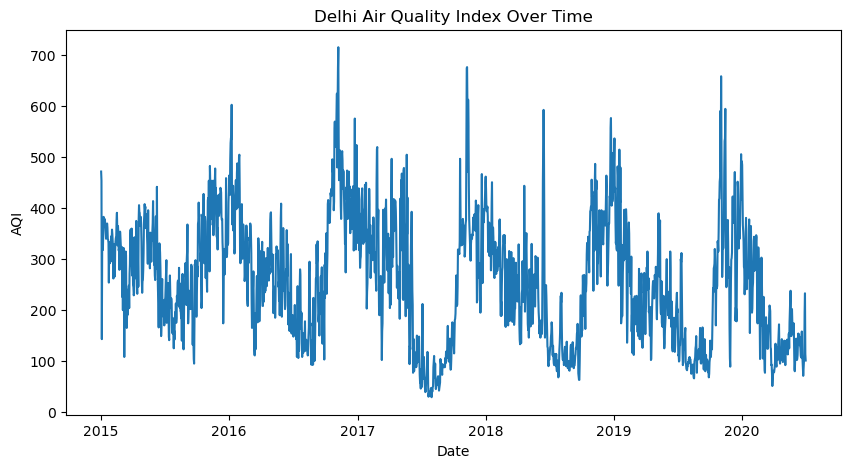

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='AQI', data=data[data['City']=='Delhi'])
plt.title('Delhi Air Quality Index Over Time')
plt.show()


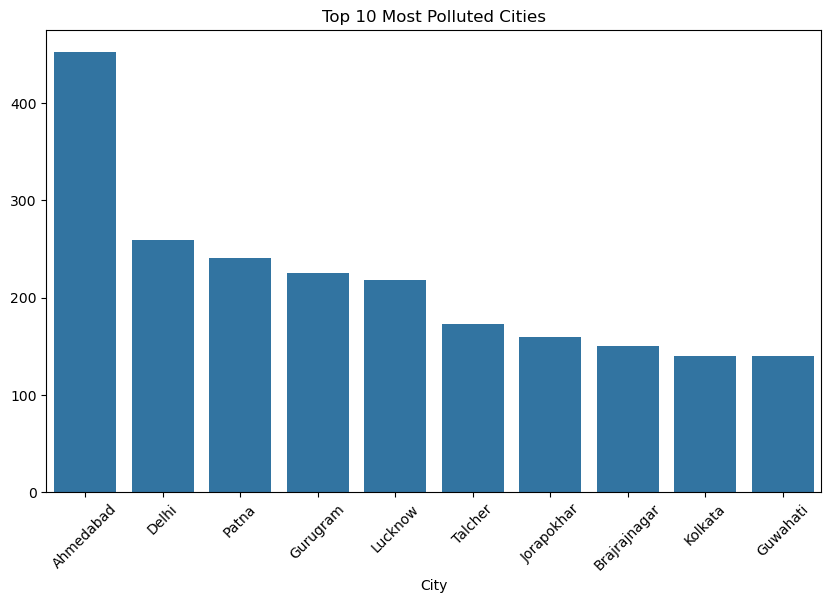

In [7]:
plt.figure(figsize=(10,6))
top_cities = data.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.xticks(rotation=45)
plt.title('Top 10 Most Polluted Cities')
plt.show()


In [8]:
data.to_csv('cleaned_air_quality.csv', index=False)
print("Cleaned dataset saved!")


Cleaned dataset saved!
